<a href="https://colab.research.google.com/github/vieduy/CS114.K21/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
time_df = pd.read_csv('data.csv', names=["size", "time"])
size = time_df['size'].astype(float)

size_n2 = pow(size, 2)
size_log = size * np.log2(size)

time_df['size_n2'] = size_n2
time_df['size_log'] = size_log
column_names = ['size', 'size_n2', 'size_log', 'time']
pr_df = time_df.reindex(columns=column_names)

data = pr_df[['size', 'size_n2', 'size_log']].values
labels = pr_df['time'].values
print(pr_df.head(5))

      size       size_n2      size_log      time
0  4032139  1.625814e+13  8.847769e+07  1.200580
1  2055486  4.225023e+12  4.310570e+07  0.509774
2  5626651  3.165920e+13  1.261712e+08  1.476080
3    42065  1.769464e+09  6.461324e+05  0.007651
4  6297788  3.966213e+13  1.422444e+08  1.661560


In [4]:
# split train-test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_test[:5])

[[9.88879000e+05 9.77881677e+11 1.96939549e+07]
 [8.23848100e+06 6.78725692e+13 1.89270425e+08]
 [3.03638000e+06 9.21960350e+12 6.53851668e+07]
 [8.01902300e+06 6.43047299e+13 1.83916253e+08]
 [5.35373000e+05 2.86624249e+11 1.01882472e+07]]


In [5]:
# choose model Linearn Regression
lire = LinearRegression()
lire.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Predict time
y_pred = lire.predict(X_test)
print('weight: ', lire.coef_)
print('bias: ',lire.intercept_)

weight:  [ 1.23219058e-08 -1.99182695e-17  1.15762451e-08]
bias:  0.0004000125402150445


In [9]:
# Print test error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


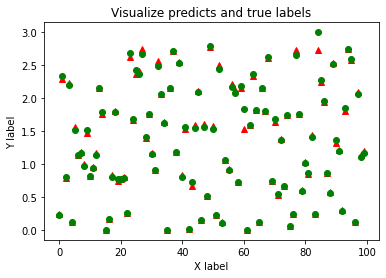

In [11]:
# Visualize pred vs true-labels
plt.plot(np.arange(0, 100), y_pred[:100], 'r^', np.arange(0, 100), y_test[:100], 'go')
plt.title('Visualize predicts and true labels')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()